<a href="https://colab.research.google.com/github/Awalilly/DataMining2023/blob/main/P300_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import os


path = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/'
subjects = ["S1", "S2", "S3", "S4", "S5"]
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Conversione e taglio dei dati


Vediamo il formato di uno dei dataset disponibili

In [3]:
file_path = os.path.join(path, "S1")
data = scipy.io.loadmat(file_path  + ".mat")

df = pd.DataFrame(data = data["y"], columns = unicorn_channels)
df["trigger"] = data["trig"]
df["sampling_rate"] = data["fs"][0][0]

df.tail()

,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,trigger,sampling_rate
60866,1.944745,14.991125,17.645742,3.853395,9.814741,12.689379,4.919972,2.081997,0,250
60867,3.763414,15.811664,19.939429,5.646384,12.336676,15.229346,8.096649,4.377673,0,250
60868,4.978524,15.326769,21.258740,6.721469,13.983540,17.125765,10.899822,6.681877,0,250
60869,5.148223,13.956691,21.167237,6.698210,14.513617,18.231895,13.049819,8.325616,0,250
60870,4.248086,12.534872,19.936828,5.562893,14.232221,18.696284,14.554562,8.995543,0,250


Mostra le righe nonzero e la loro lunghezza

In [4]:
trigger = np.array(df.trigger)
print(np.nonzero(trigger), len(np.nonzero(trigger)[0]))
df[df['trigger'] == -1]

(array([ 1254,  1299,  1342, ..., 59446, 59489, 59534]),) 1200


,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,trigger,sampling_rate
1254,8.912577,13.229173,6.228896,2.447171,25.916398,36.054147,19.562200,13.073061,-1,250
1299,-7.336307,-11.036725,-21.442608,2.300997,-7.519493,-15.673843,-8.715088,-2.988319,-1,250
1342,13.943872,4.982319,3.258841,22.729455,12.716335,10.205575,16.277585,11.325435,-1,250
1383,-6.119747,1.473828,-2.737117,16.028940,5.256916,4.132745,5.218251,0.880401,-1,250
1476,-3.073975,-1.354941,0.826069,-0.848783,5.426639,8.253533,15.117800,7.536998,-1,250
...,...,...,...,...,...,...,...,...,...,...
59357,-1.586491,-0.798545,1.544695,80.303724,-0.004569,2.433992,2.025303,-1.030675,-1,250
59400,0.316900,-7.582847,-7.557925,-8.797569,-13.161097,-8.839269,-7.411630,-9.298103,-1,250
59446,2.564232,-4.108682,5.299316,-17.479603,4.568573,-3.299100,2.305101,4.350463,-1,250
59489,6.002336,-9.763325,-10.999651,-53.579940,-3.958552,-9.046656,-5.626558,-3.204578,-1,250


Visualizziamo la distribuzione dei dati rispetto al trigger

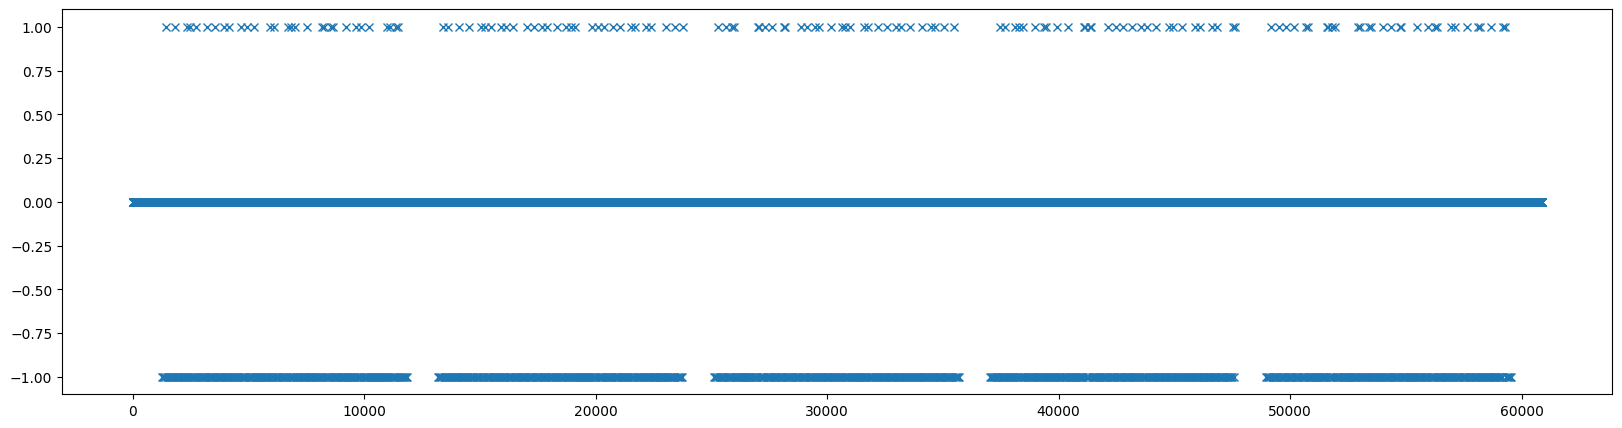

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(trigger, 'x')

In [6]:
target = np.where(trigger == 1)[0]
not_target = np.where(trigger == -1)[0]

perc_NT = (len(target) / len(np.nonzero(trigger)[0])) * 100
perc_T = 100 - perc_NT
print(len(target), len(not_target), perc_NT, '%', perc_T, '%')

150 1050 12.5 % 87.5 %


Ora tagliamo la finestra iniziale e finale dell'esperimento in cui non ci sono dati di trigger o non trigger, e salviamo il risultato in .json.

In [7]:
min_i = np.array(np.min(df[df.trigger == -1].index), np.min(df[df.trigger == 1].index))
max_i = np.array(np.max(df[df.trigger == -1].index), np.max(df[df.trigger == 1].index))

min_i = np.min(min_i)
max_i = np.max(max_i)

print(min_i, max_i)

1254 59534


In [8]:
for subj in subjects:
  file_path = os.path.join(path, subj)
  data = scipy.io.loadmat(file_path  + ".mat")

  df = pd.DataFrame(data = data["y"], columns = unicorn_channels)
  df["trigger"] = data["trig"]
  df["sampling_rate"] = data["fs"][0][0]

  min_i = np.array(np.min(df[df.trigger == -1].index), np.min(df[df.trigger == 1].index))
  max_i = np.array(np.max(df[df.trigger == -1].index), np.max(df[df.trigger == 1].index))

  min_i = np.min(min_i) - 250
  max_i = np.max(max_i) + 250
  print(min_i, max_i)

  df.drop(index = df.index[max_i:], inplace = True)
  df.drop(index = df.index[:min_i], inplace = True)

  df = df.reset_index(drop = True)

  new_path = os.path.join(path, subj)
  df.to_json(new_path + ".json")

1004 59784
1000 59723
1017 59809
996 59704
997 59772


In [9]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/S5.json")
df.head()

,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,trigger,sampling_rate
0,-5.573264,-9.901115,-1.432157,3.790951,6.800338,8.954083,-4.909572,-1.812078,0,250
1,-3.793412,-9.346617,-2.263005,3.483170,6.447730,10.683638,-4.999851,-1.804441,0,250
2,-1.929686,-8.552265,-3.414313,3.604763,6.479627,11.378168,-4.722371,-1.221502,0,250
3,-0.611933,-7.326602,-4.007423,3.780686,6.977241,10.944066,-4.151253,-0.238164,0,250
4,0.166086,-5.409686,-3.189657,3.924152,8.034659,9.705838,-3.238282,1.056779,0,250
